<a href="https://colab.research.google.com/github/Rpmalukani22/Deep-learning-coursera/blob/master/Learn_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format='svg'

In [0]:
learning_rate=0.01
epoches=200

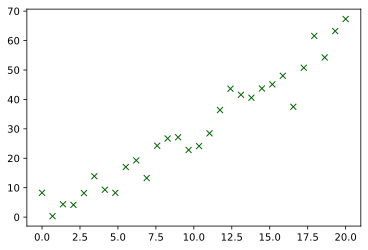

In [0]:
#creating a toy dataset
n_samples=30
x_train=np.linspace(0,20,n_samples)
y_train=3*x_train+5*np.random.randn(n_samples)
plt.plot(x_train,y_train,'x',color='darkgreen')